In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [2]:
class VGG19(Sequential):
  def __init__(self, input_shape):
    super().__init__()

    self.add(Conv2D(64, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu', input_shape = input_shape))
    self.add(Conv2D(64, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

    self.add(Conv2D(128, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(Conv2D(128, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

    self.add(Conv2D(256, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(Conv2D(256, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(Conv2D(256, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(Conv2D(256, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

    self.add(Conv2D(512, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(Conv2D(512, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(Conv2D(512, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(Conv2D(512, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

    self.add(Conv2D(512, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(Conv2D(512, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(Conv2D(512, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(Conv2D(512, kernel_size = (3, 3), padding = 'same',
                    activation = 'relu'))
    self.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

    self.add(Flatten())
    self.add(Dense(4096, activation = 'relu'))
    self.add(Dropout(0.5))
    self.add(Dense(4096, activation = 'relu'))
    self.add(Dropout(0.5))
    self.add(Dense(1000, activation = 'softmax'))

    self.compile(optimizer = tf.keras.optimizers.Adam(0.003), loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])

In [3]:
model = VGG19(input_shape = (224, 224, 3))
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                         

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd "/content/drive/MyDrive/pic"
!unzip "vgg19_weights_tf_dim_ordering_tf_kernels.h5.zip"

/content/drive/MyDrive/pic
Archive:  vgg19_weights_tf_dim_ordering_tf_kernels.h5.zip
  inflating: vgg19_weights_tf_dim_ordering_tf_kernels.h5  


In [6]:
model.load_weights("/content/drive/MyDrive/pic/vgg19_weights_tf_dim_ordering_tf_kernels.h5")
classes = {282 : 'cat', 681 : 'notebook, notebook computer', 970 : 'alp'}

TypeError: ignored

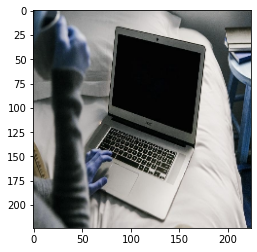

In [15]:
image1 = cv2.imread('/content/drive/MyDrive/pic/12.jpg')
image1 = cv2.resize(image1, (224, 224))
plt.figure()
plt.imshow(image1)
image1 = image1[np.newaxis, :]
predicted_value = model.predict(image1)
plt.title(classes[predicted_value[0]])